In [98]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
random.seed(42)

from gym_wumpus.envs import wumpusenv_classic
from qlearning_agent import QlearningAgent
from utils import id2actions

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
env = wumpusenv_classic(size=4, seed=6)
env.reset()
env.render()

┌───┬───┬───┬───┐
│W P│   │   │   │
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ G │   │
│ @^│   │   │   │
└───┴───┴───┴───┘


In [105]:
agent = QlearningAgent(env=env)

qtable, rewards = agent.train(
    episodes=10_000, 
    alpha=0.2, 
    alpha_min=0.1,
    gamma=0.99, 
    epsilon=0.4,
    epsilon_min=0.01,
    decay=1e-6,
    verbose=True
)

Episode 0/10000, reward -89.0, random actions 16, actions 29, epsilon 0.40, alpha 0.20, 
Episode 1000/10000, reward 2018.0, random actions 7, actions 18, epsilon 0.25, alpha 0.16, 
Episode 2000/10000, reward 2010, random actions 2, actions 15, epsilon 0.06, alpha 0.11, 
Episode 3000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 
Episode 4000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 
Episode 5000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 
Episode 6000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 
Episode 7000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 
Episode 8000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 
Episode 9000/10000, reward 2020, random actions 0, actions 10, epsilon 0.01, alpha 0.10, 


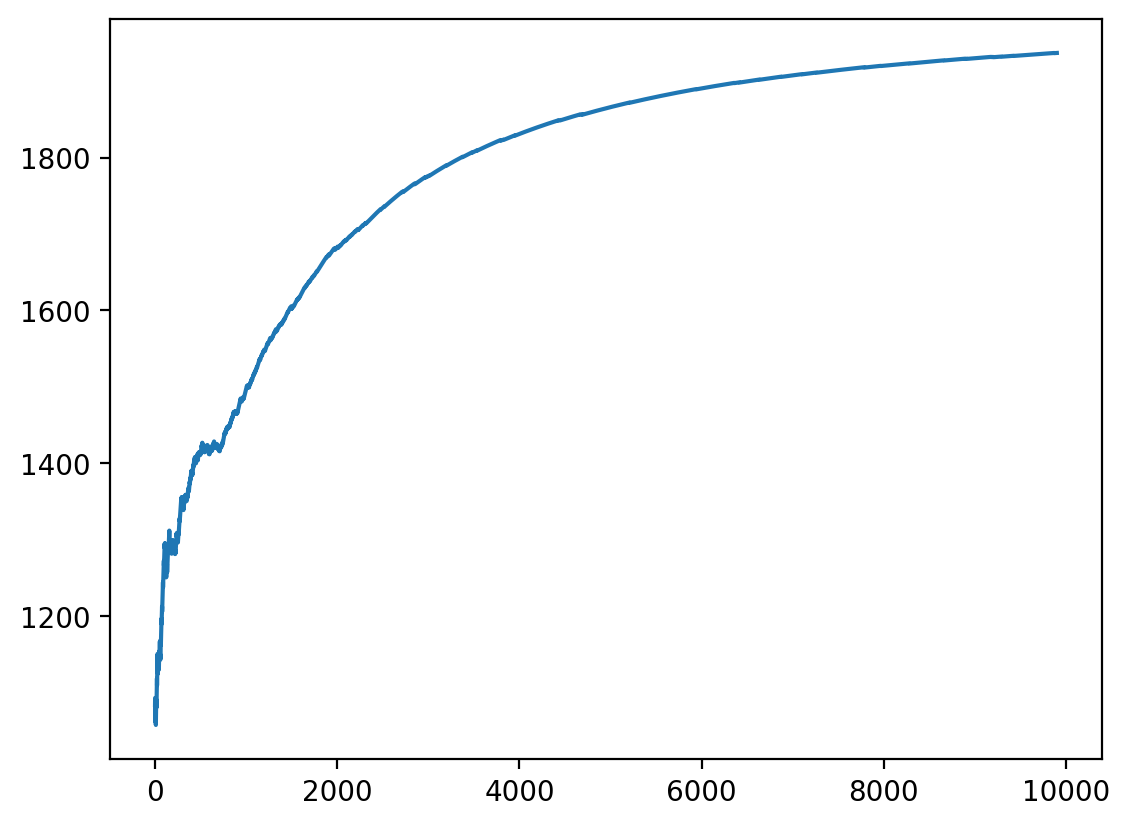

In [106]:
burn_period = 100
plt.plot(np.cumsum(rewards)[burn_period:] / np.arange(len(rewards))[burn_period:]);

In [107]:
eval_reward, frames, actions = agent.evaluate()
print(eval_reward)
print([id2actions[a.value] for a in actions])

981.0
['SHOOT', 'RIGHT', 'MOVE', 'MOVE', 'GRAB', 'RIGHT', 'RIGHT', 'MOVE', 'MOVE', 'CLIMB']


In [108]:
import time
from IPython import display

for frame, action in zip(frames, actions):

    action_name = id2actions[action.value]
    
    display.clear_output(wait=True)
    print(frame)
    print(action_name)

    time.sleep(0.3)

┌───┬───┬───┬───┐
│  P│   │   │   │
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
│ @<│   │   │   │
└───┴───┴───┴───┘
CLIMB
